In [1]:
import glob

from torch.nn.functional import interpolate
from torch.utils.data import DataLoader

from inpainting import transforms
from inpainting.load import SequenceDataset
from inpainting.visualize import tensor_to_pil_image, flow_tensor_to_image_tensor


In [2]:
dataset = SequenceDataset(
    list(glob.glob(f'../data/raw/DAVIS/JPEGImages/tennis')),
    'image',
    sequence_length=2,
    transform=transforms.ToTensor()
)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [3]:
prev_image, curr_image = next(iter(data_loader))

In [4]:
_, _, w, h = curr_image.size()
prev_image = interpolate(prev_image, size=[w // 64 * 64, h // 64 * 64]).cuda()
curr_image = interpolate(curr_image, size=[w // 64 * 64, h // 64 * 64]).cuda()

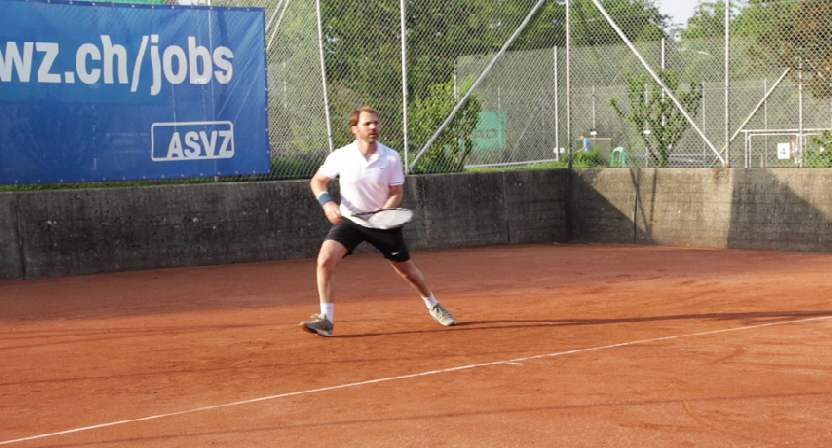

In [5]:
tensor_to_pil_image(prev_image)

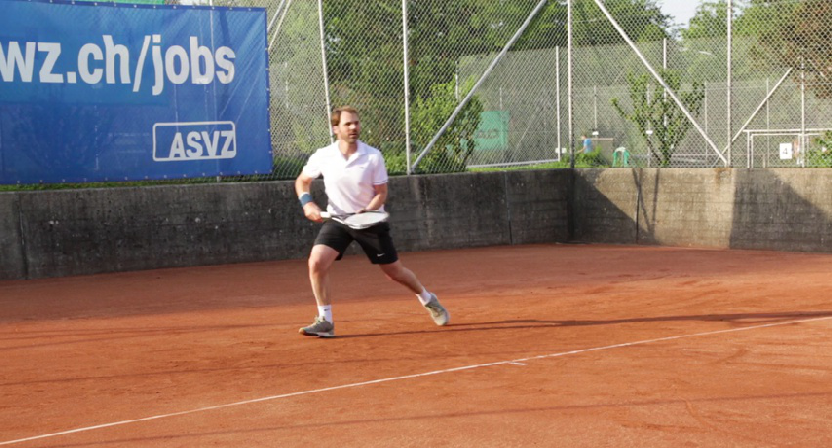

In [6]:
tensor_to_pil_image(curr_image)

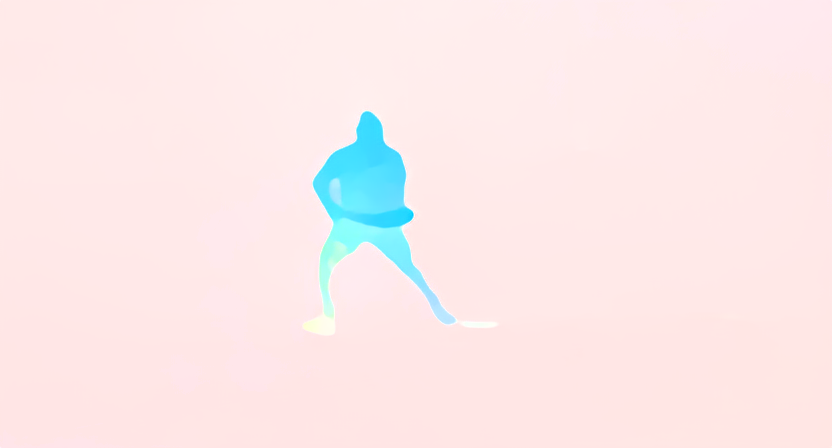

In [7]:
from inpainting.flow.flownet2.model import FlowNet2Model

model = FlowNet2Model('../models/flow/flownet2/FlowNet2_checkpoint.pth.tar').cuda()
result = model(prev_image, curr_image)
tensor_to_pil_image(flow_tensor_to_image_tensor(result))

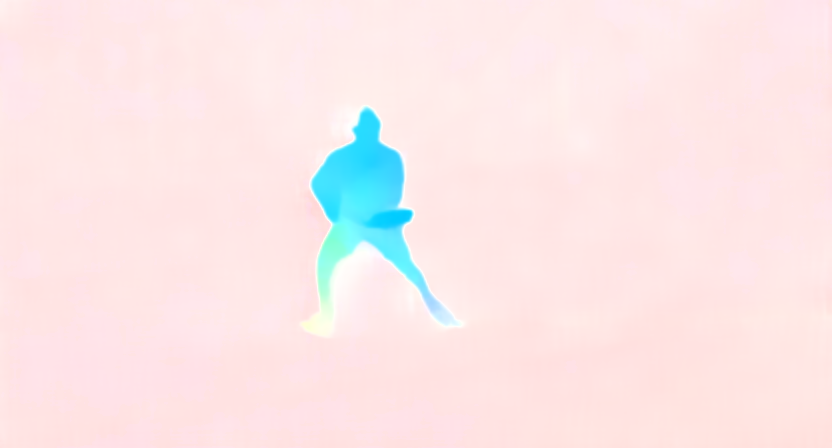

In [8]:
from inpainting.flow.liteflownet.model import LiteFlowNetModel

model = LiteFlowNetModel('../models/flow/liteflownet/network-default.pytorch').cuda()
result = model(prev_image, curr_image)
tensor_to_pil_image(flow_tensor_to_image_tensor(result))

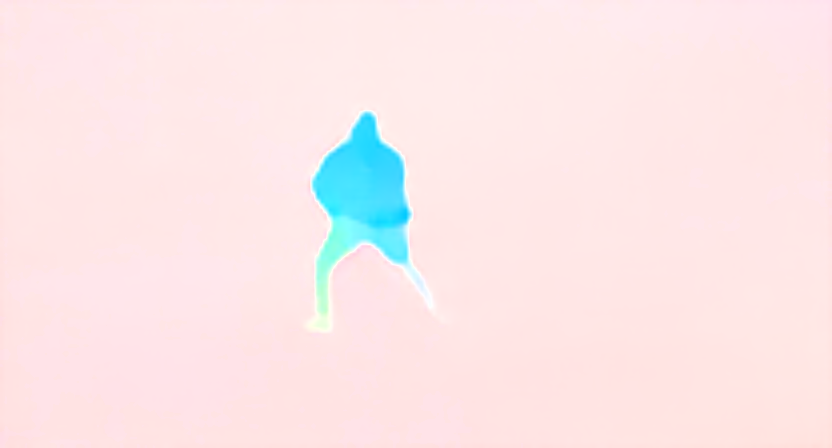

In [9]:
from inpainting.flow.pwcnet.model import PWCNetModel

model = PWCNetModel('../models/flow/pwcnet/network-default.pytorch').cuda()
result = model(prev_image, curr_image)
tensor_to_pil_image(flow_tensor_to_image_tensor(result))